# Wine Quality Regression and Classification Model

## Data Exploration and Preparation

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

In [46]:
red = pd.read_csv('/content/winequality-red.csv', sep = ';')
white = pd.read_csv('/content/winequality-white.csv', sep = ';')

In [47]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [49]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [51]:
# Proportion of duplicate rows without counting the first occurrence and total rows
print(f'Red: {(red.duplicated(keep = "first").sum()) / red.shape[0]}')
print(f'White: {(white.duplicated(keep = "first").sum()) / white.shape[0]}')

Red: 0.150093808630394
White: 0.19130257247856267


In [52]:
red.drop_duplicates(keep='first', inplace = True)
white.drop_duplicates(keep = 'first', inplace = True)

In [53]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Outliers are present in features: free sulfur dioxide and total sulfur dioxide

In [54]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### Outliers are present in features: free sulfur dioxide and total sulfur dioxide

In [55]:
red.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [56]:
white.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


#### Split data

In [71]:
X_red = red.drop(columns = 'quality')
y_red = red['quality']
X_white = white.drop(columns = 'quality')
y_white = white['quality']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size = 0.30, random_state = 42, stratify = y_red)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size = 0.30, random_state = 42, stratify = y_white)

### Addressing Outliers with Winsorizing approach

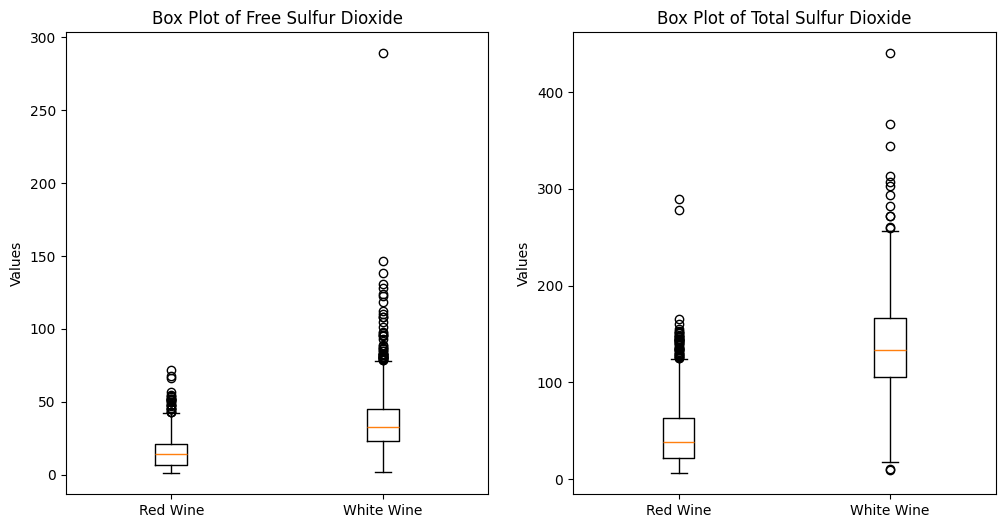

In [72]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([X_red['free sulfur dioxide'], X_white['free sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Free Sulfur Dioxide')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
plt.boxplot([X_red['total sulfur dioxide'], X_white['total sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Total Sulfur Dioxide')
plt.ylabel('Values')
plt.show()

In [73]:
# Function for capping outliers which is not in the range of 1st to 99th percentile
def cap_outliers_iqr(df, column):
    lower_cap = df[column].quantile(0.01)
    upper_cap = df[column].quantile(0.99)

    # Cap the outliers
    df[column] = np.where(df[column] < lower_cap, lower_cap,
                          np.where(df[column] > upper_cap, upper_cap, df[column]))

    return df

column_outlier = ['free sulfur dioxide', 'total sulfur dioxide']

X_train_red_capped = X_train_red.copy()
X_train_white_capped = X_train_white.copy()

for column in column_outlier:
    X_train_red_capped = cap_outliers_iqr(X_train_red_capped, column)
    X_train_white_capped = cap_outliers_iqr(X_train_white_capped, column)

### Results after removing outliers

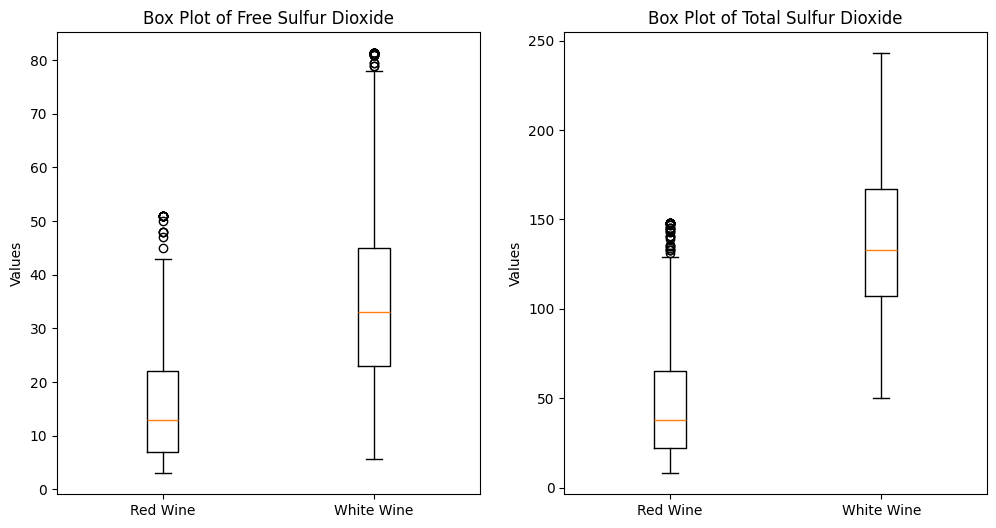

In [74]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([X_train_red_capped['free sulfur dioxide'], X_train_white_capped['free sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Free Sulfur Dioxide')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
plt.boxplot([X_train_red_capped['total sulfur dioxide'], X_train_white_capped['total sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Total Sulfur Dioxide')
plt.ylabel('Values')
plt.show()

## Data Visualization

Text(0.5, 0, 'White Wine Quality')

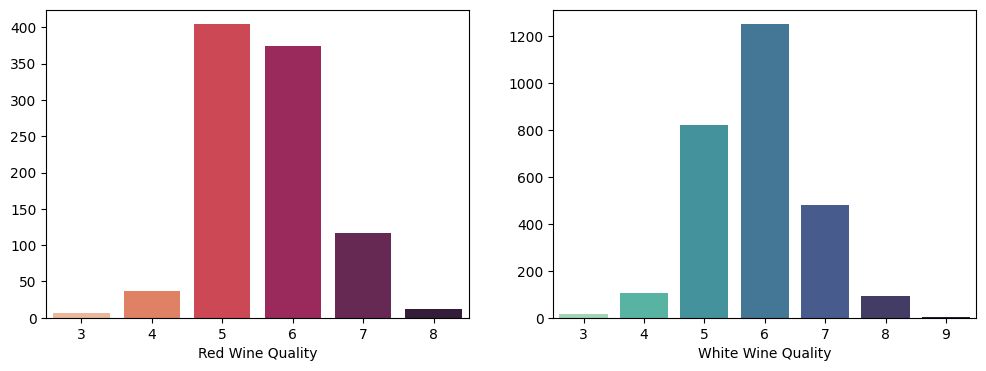

In [75]:
plt.figure(figsize = (12, 4))

count_quality_red = y_train_red.value_counts().sort_index() # this is used for x and y in sns.barplot
count_quality_white = y_train_white.value_counts().sort_index()
palette_red = sns.color_palette("rocket", len(count_quality_red))[::-1] # reverse the color palette so that higher quality is associated with darker color
palette_white = sns.color_palette("mako", len(count_quality_white))[::-1]

plt.subplot(1, 2, 1)
sns.barplot(x = count_quality_red.index, y = count_quality_red.values, hue = count_quality_red.index, palette=palette_red, legend=False)
plt.xlabel('Red Wine Quality')

plt.subplot(1, 2, 2)
sns.barplot(x = count_quality_white.index.to_list(), y = count_quality_white.values, hue = count_quality_white.index, palette=palette_white, legend=False)
plt.xlabel('White Wine Quality')

#### Hence, this is an imbalanced dataset

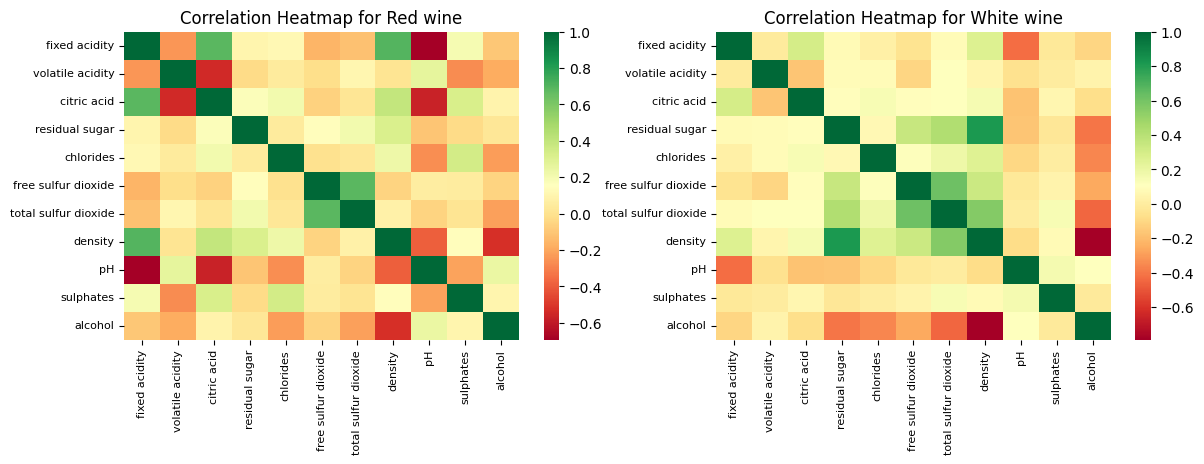

In [76]:
plt.figure(figsize = (14, 4))

plt.subplot(1, 2, 1)
sns.heatmap(X_train_red_capped.corr(), cmap = 'RdYlGn')
plt.title('Correlation Heatmap for Red wine')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.subplot(1, 2, 2)
sns.heatmap(X_train_white_capped.corr(), cmap = 'RdYlGn')
plt.title('Correlation Heatmap for White wine')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

To prevent multicollinearity, I avoid selecting features that are linearly dependent (high correlation)

## Feature Selection

### Lasso Regression for Red wine

In [80]:
# parameters to be tested on GridSearchCV
params = {"alpha": np.linspace(0.00001, 10, 500)}

# setting KFold for Cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Instantiate a lasso regression model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv = GridSearchCV(lasso, param_grid = params, cv = kf)
lasso_cv.fit(X_train_red_capped, y_train_red)
print(f'Best Lasso Alpha for Red wine: {lasso_cv.best_params_["alpha"]}')

Best Lasso Alpha for Red wine: 1e-05


### Lasso Regression for White wine

In [81]:
lasso_cv = GridSearchCV(lasso, param_grid = params, cv = kf)

lasso_cv.fit(X_train_white_capped, y_train_white)
print("Best Lasso Alpha for White wine: {}".format(lasso_cv.best_params_['alpha']))

Best Lasso Alpha for White wine: 1e-05


## Plot Feature Selection

In [82]:
# Red wine
X_feature_red = X_train_red_capped.values
y_feature_red = y_train_red.values
names_red = X_train_red_capped.columns

lasso_red = Lasso(alpha=0.00001)
lasso_red.fit(X_feature_red, y_feature_red)
lasso_coef_red = lasso_red.coef_

# White wine
X_feature_white = X_train_white_capped.values
y_feature_white = y_train_white.values
names_white = X_train_white_capped.columns

lasso_white = Lasso(alpha=0.00001)
lasso_white.fit(X_feature_white, y_feature_white)
lasso_coef_white = lasso_white.coef_

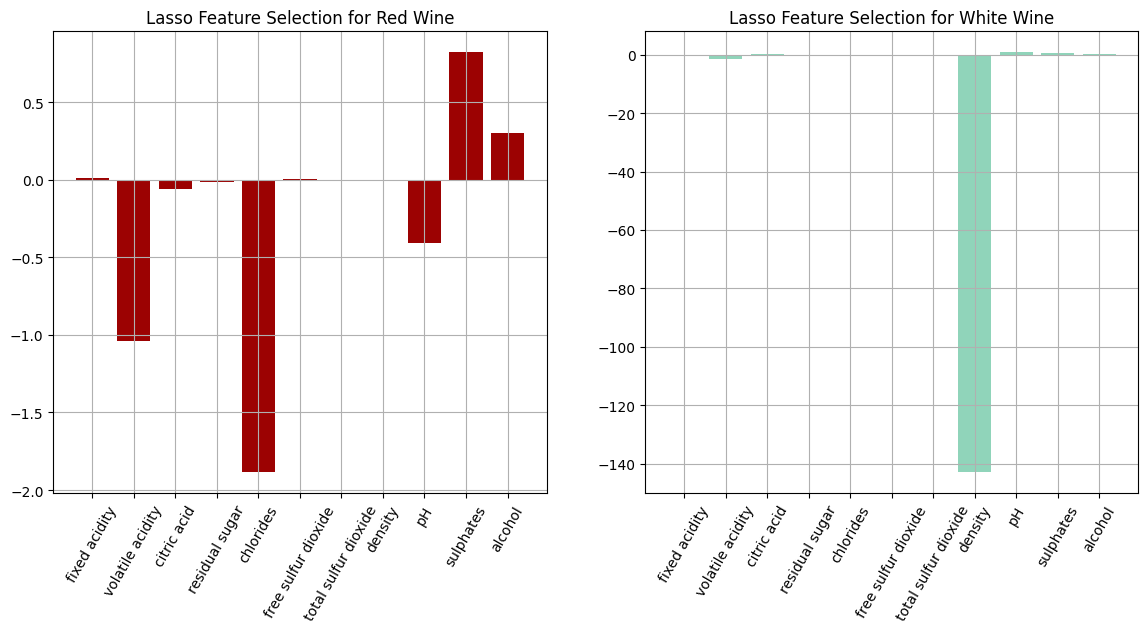

In [83]:
# Plot results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(names_red, lasso_coef_red, color='#9c0202')
plt.grid()
plt.title('Lasso Feature Selection for Red Wine')
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
plt.bar(names_white, lasso_coef_white, color='#90d4ba')
plt.grid()
plt.title('Lasso Feature Selection for White Wine')
plt.xticks(rotation=60)

plt.show()

#### Therefore, I will be using these features
1. Red wine: volatile acidity, chlorides, pH, sulphates, alcohol
2. White wine: volatile acidity, pH, density

## Data Prediction

In [91]:
X_train_red_capped = X_train_red_capped[['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']]
X_train_white_capped = X_train_white_capped[['volatile acidity', 'pH', 'density']]

X_test_red = X_test_red[['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']]
X_test_white = X_test_white[['volatile acidity', 'pH', 'density']]

### Logistic Regression

In [88]:
log_reg = LogisticRegression(multi_class='multinomial')
log_reg_cv_scores = cross_val_score(log_reg, X_train_red_capped, y_train_red, cv = kf)

print(f'Logistic Regression Accuracy for Red Wine train dataset: {log_reg_cv_scores.mean()}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Mean Accuracy for Red Wine train dataset: 0.5657646734637641


### KNN
Red wine dataset

In [92]:
n_index = list(range(1,11))
knn_cv_scores = [] # cross validation score for train dataset
test = [] # accuracy score for test dataset
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in list(range(1,11)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_red_capped, y_train_red.to_numpy().ravel())

    # train score
    knn_cv_scores.append(cross_val_score(knn, X_train_red_capped, y_train_red.to_numpy().ravel(), cv = kf).mean())

    # test score
    test.append(knn.score(X_test_red, y_test_red))

print(pd.DataFrame({
    'n_neighbor': n,
    'Train': knn_cv_scores,
    'Test': test}))

   n_neighbor     Train      Test
0           1  0.488917  0.539216
1           2  0.502629  0.531863
2           3  0.502618  0.507353
3           4  0.513106  0.514706
4           5  0.528912  0.526961
5           6  0.547837  0.529412
6           7  0.547809  0.546569
7           8  0.546779  0.551471
8           9  0.556241  0.561275
9          10  0.559399  0.556373


### Rule Engine Node to Create a Binary Target Variable

In [101]:
y_bitrain_red = np.where(y_train_red > 6.5, 1, 0)  # 1 = good, 0 = bad
y_bitrain_white = np.where(y_train_white > 6.5, 1, 0)  # 1 = good, 0 = bad

y_bitest_red = np.where(y_test_red > 6.5, 1, 0)  # 1 = good, 0 = bad
y_bitest_white = np.where(y_test_white > 6.5, 1, 0)  # 1 = good, 0 = bad

In [96]:
count_bi_red = pd.Series(y_bitrain_red).value_counts().sort_index() # this is used for x and y in sns.barplot
count_bi_white = pd.Series(y_bitrain_white).value_counts().sort_index()

print(count_bi_red)
print(count_bi_white)

0    822
1    129
Name: count, dtype: int64
0    2194
1     578
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x7d2f77714b50>,
 [Text(0, 0, 'Bad'), Text(1, 0, 'Good')])

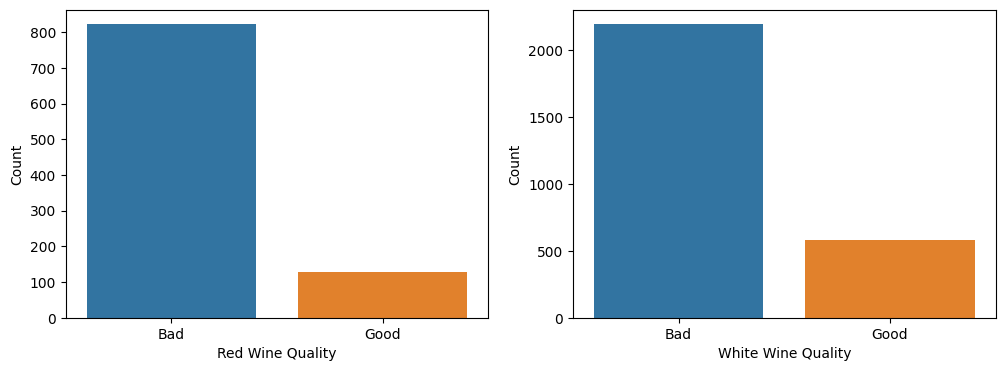

In [97]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x = count_bi_red.index, y = count_bi_red.values, hue = count_bi_red.index, legend=False)
plt.xlabel('Red Wine Quality')
plt.ylabel('Count')
plt.xticks([0, 1], ['Bad', 'Good'])

plt.subplot(1, 2, 2)
sns.barplot(x = count_bi_white.index, y = count_bi_white.values, hue = count_bi_white.index, legend=False)
plt.xlabel('White Wine Quality')
plt.ylabel('Count')
plt.xticks([0, 1], ['Bad', 'Good'])

#### Hence, this is the imbalanced dataset

### Decision Tree
Using ROC curve and the AUC value as scoring metric

In [98]:
# Adjust for imbalanced data, giving more weight to minority class than before adjusting
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced') # balanced class weight help adjust weight for imbalanced dataset

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data

In [100]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}

red_search = GridSearchCV(estimator=tree,
                             param_grid=param_grid,
                             scoring='roc_auc', # suits when class imbalance is present.
                             cv=kf,
                             verbose=2,
                             n_jobs=-1)

red_search.fit(X_train_red_capped, y_bitrain_red)

print(f'Best Parameters: {red_search.best_params_}')
print(f'Best Cross-Validation Score: {red_search.best_score_}')

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8230029666910624


In [102]:
best_red = red_search.best_estimator_
y_prob_red = best_red.predict_proba(X_test_red)[:, 1] # probabilities for 'good' class

# calculate ROC Curve and AUC
fpr_red, tpr_red, thresholds_red = roc_curve(y_bitest_red, y_prob_red)
roc_auc_red = auc(fpr_red, tpr_red)

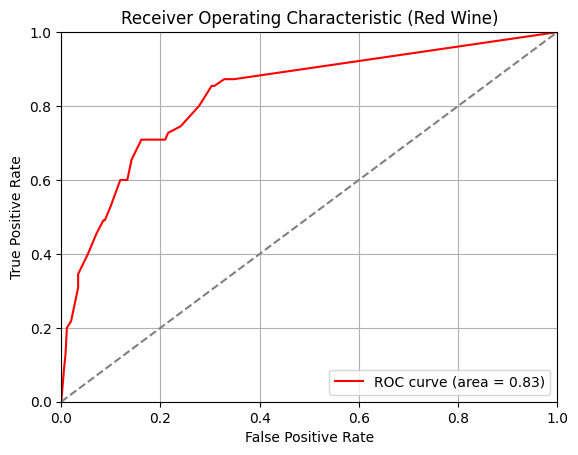

In [106]:
plt.figure()
plt.plot(fpr_red, tpr_red, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc_red))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # random classifier line
plt.xlim([0.0, 1.0]) # set the limits of the x-axis
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Red Wine)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [107]:
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}

white_search = GridSearchCV(estimator=tree,
                             param_grid=param_grid,
                             scoring='roc_auc', # suits when class imbalance is present.
                             cv=kf,
                             verbose=2,
                             n_jobs=-1)

white_search.fit(X_train_white_capped, y_bitrain_white)

print(f'Best Parameters: {white_search.best_params_}')
print(f'Best Cross-Validation Score: {white_search.best_score_}')

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.75, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Score: 0.7279206592704184


In [108]:
best_white = white_search.best_estimator_
y_prob_white = best_white.predict_proba(X_test_white)[:, 1] # probabilities for 'good' class

# calculate ROC Curve and AUC
fpr_white, tpr_white, thresholds_white = roc_curve(y_bitest_white, y_prob_white)
roc_auc_white = auc(fpr_white, tpr_white)

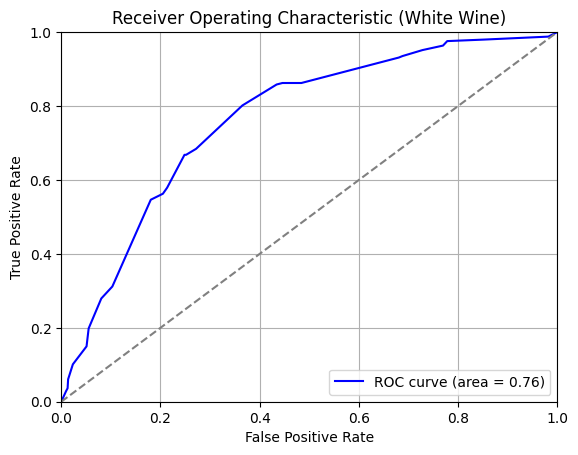

In [109]:
plt.figure()
plt.plot(fpr_white, tpr_white, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_white))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (White Wine)')
plt.legend(loc='lower right')
plt.grid()
plt.show()